In [41]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib
import pickle
import joblib
import random

In [42]:
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
Y=train["label"]
X=train.drop("label",axis=1)
x_train , x_test , y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [43]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5

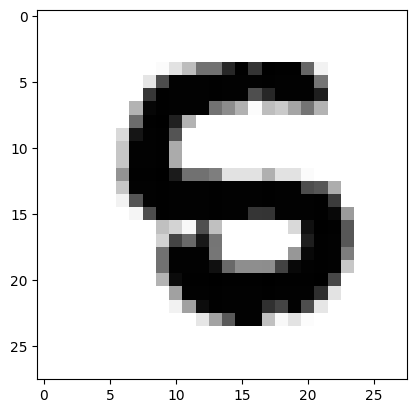

In [44]:
idx=11
some=np.array(X.iloc[idx])
imag=some.reshape(28,28)
plt.imshow(imag,cmap=matplotlib.cm.binary)
# plt.imshow(imag)
Y.iloc[idx]

In [45]:
clf = KNeighborsClassifier(n_neighbors=7).fit(x_train,y_train)
predition=clf.predict(x_test)
accuracy_score(y_test,predition)*100

95.84615384615385

In [46]:
submission=clf.predict(test)
df=pd.DataFrame({"ImageId":np.arange(1,len(test)+1),"Label":submission})
df.to_csv("./sample_submission.csv",index=False)

In [47]:
pickle.dump(clf,open('model2.pkl','wb'))